<a href="https://colab.research.google.com/github/DanB1421/DATA603/blob/main/DATA603_FinalProject_ChaudryBrilliant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Breast Cancer Diagnosis Project**
##Salma Chaudry and Daniel Brilliant
##DATA 603

###**Project Goals**
*   Utilize medical data to analyze and detect early stages of breast cancer
*   Employ deep learning to assist in breast cancer detection by analyzing mammogram images

###**Project Relevance**
*   Breast Cancer is the most common cancer for women in the United States; further research, analysis, and insights can provide the medical community with a tool to assist in the Breast Cancer detection process
*  Potentially can assist medical providers in early detection, personalized treatment, and improved screening accuracy, ultimately saving lives and enhancing healthcare accessibility in the United States and other countries

###**Dataset Link**
*   https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/




#**STEP 1: Uploading Dataset**

In [ ]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
from PIL import Image
import random
import re
import io


#mount Google Drive
drive.mount('/content/drive')

#path to the 'breastCancerProject' folder on Google Drive
project_path = '/content/drive/MyDrive/breastCancerProject'

#defines paths to 'jpeg' and 'csv' folders
jpeg_path = os.path.join(project_path, 'archive', 'jpeg')
csv_path = os.path.join(project_path, 'archive', 'csv')

#visualizes a random subset of files in 'csv' folder
print("\nSample of files in 'csv' folder:")
csv_files = os.listdir(csv_path)
random_sample_csv = random.sample(csv_files, min(6, len(csv_files)))  #shows 6 of the CSV files

for file in random_sample_csv:
    print(file)
    #opens and displays the first few rows of the CSV file
    csv_file_path = os.path.join(csv_path, file)
    df = pd.read_csv(csv_file_path).head(100)
    display(df.head())

#prints nummber of files in 'csv' folder
print(f"Number of files in 'csv' folder: {len(csv_files)}")

#visualizes files in 'csv' folder
print("\nFiles in 'csv' folder:")
csv_files = os.listdir(csv_path)
for file in csv_files:
    print(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Sample of files in 'csv' folder:
mass_case_description_test_set.csv


,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


calc_case_description_test_set.csv


,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


calc_case_description_train_set.csv


,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


dicom_info.csv


,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


mass_case_description_train_set.csv


,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


meta.csv


,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


Number of files in 'csv' folder: 6

Files in 'csv' folder:
calc_case_description_train_set.csv
dicom_info.csv
calc_case_description_test_set.csv
mass_case_description_test_set.csv
mass_case_description_train_set.csv
meta.csv


Sample of folders in 'jpeg' folders:
1.3.6.1.4.1.9590.100.1.2.298313146910425770935272485680824905058


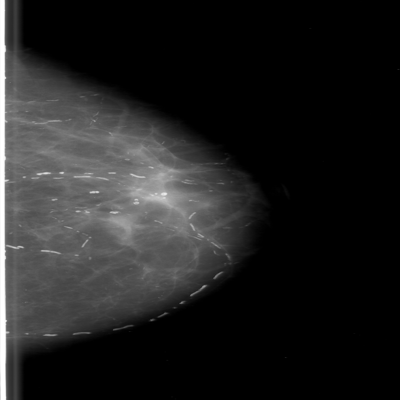

1.3.6.1.4.1.9590.100.1.2.256467310212718130229233647384110196667


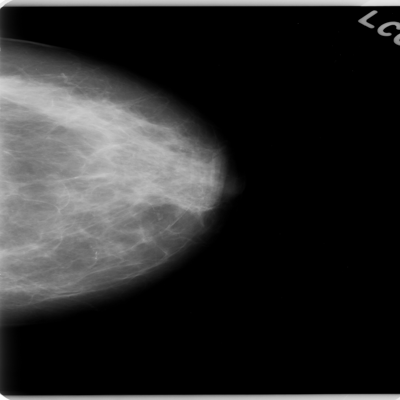

1.3.6.1.4.1.9590.100.1.2.129594164412130614306422222392803220137


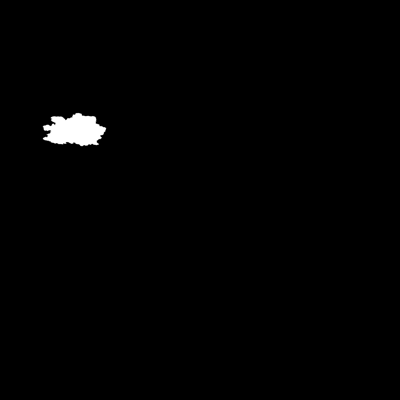

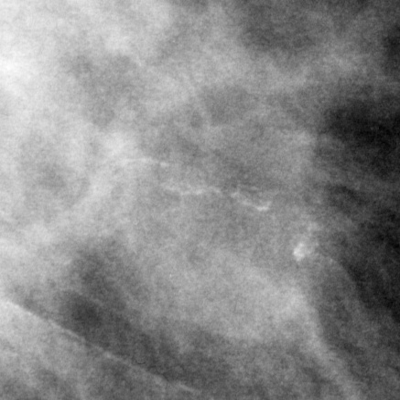

1.3.6.1.4.1.9590.100.1.2.204173776013736332214262798293950507299


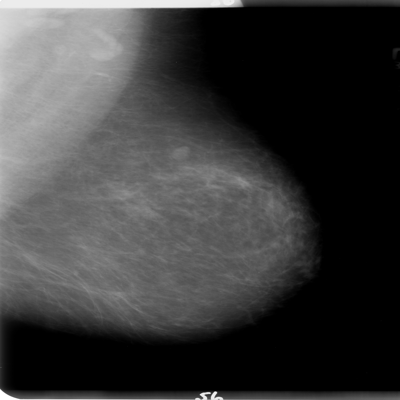

1.3.6.1.4.1.9590.100.1.2.159291141810912015217099519221852402492


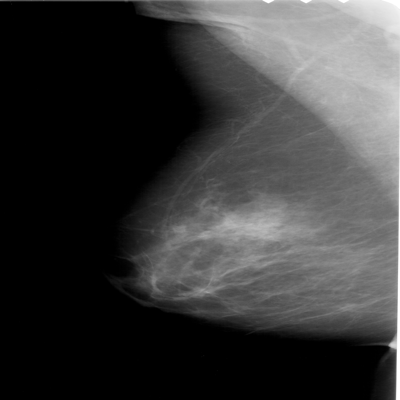

Number of folders in 'jpeg' folder: 6774


In [ ]:
#visualizes a random subset of files in 'jpeg' folder
print("Sample of folders in 'jpeg' folders:")
jpeg_files = os.listdir(jpeg_path)
random_sample_jpeg = random.sample(jpeg_files, min(5, len(jpeg_files)))  #adjust sample size as needed

for folder in random_sample_jpeg:
    #opens and displays the image
    print(folder)
    image_path = os.path.join(jpeg_path, folder)
    files = os.listdir(image_path)
    for file in files:
        file_path = os.path.join(image_path, file)
        img = Image.open(file_path)
        new_image = img.resize((400, 400)) #specify image size
        display(new_image)

print(f"Number of folders in 'jpeg' folder: {len(jpeg_files)}")

#**STEP 2: Data Cleaning and EDA**

##**Demonstrating column names and removing unnecessary columns**

###calc_case_train

In [ ]:
#columns before data cleaning
calc_case_train = pd.read_csv('/content/drive/MyDrive/breastCancerProject/archive/csv/calc_case_description_train_set.csv')
calc_case_train.head(5)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [ ]:
#reduced columns after data cleaning
calc_case_train = calc_case_train.drop(['abnormality id','cropped image file path', 'ROI mask file path', 'breast density', 'left or right breast', 'image view', 'assessment', 'subtlety'], axis=1)
calc_case_train.head(5)

,patient_id,abnormality type,calc type,calc distribution,pathology,image file path
0,P_00005,calcification,AMORPHOUS,CLUSTERED,MALIGNANT,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...
1,P_00005,calcification,AMORPHOUS,CLUSTERED,MALIGNANT,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...
2,P_00007,calcification,PLEOMORPHIC,LINEAR,BENIGN,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...
3,P_00007,calcification,PLEOMORPHIC,LINEAR,BENIGN,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...
4,P_00008,calcification,NaN,REGIONAL,BENIGN_WITHOUT_CALLBACK,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...


###calc_case_test

In [ ]:
#columns before data cleaning
calc_case_test = pd.read_csv('/content/drive/MyDrive/breastCancerProject/archive/csv/calc_case_description_test_set.csv')
calc_case_test.head(5)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [ ]:
#reduced columns after data cleaning
calc_case_test = calc_case_test.drop(['abnormality id','cropped image file path', 'ROI mask file path', 'breast density', 'left or right breast', 'image view', 'assessment', 'subtlety'], axis=1)
calc_case_test.head(5)

,patient_id,abnormality type,calc type,calc distribution,pathology,image file path
0,P_00038,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,BENIGN,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...
1,P_00038,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,BENIGN,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...
2,P_00038,calcification,VASCULAR,NaN,BENIGN_WITHOUT_CALLBACK,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...
3,P_00038,calcification,VASCULAR,NaN,BENIGN_WITHOUT_CALLBACK,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...
4,P_00038,calcification,VASCULAR,NaN,BENIGN_WITHOUT_CALLBACK,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...


###mass_case_train

In [ ]:
#columns before data cleaning
mass_case_train = pd.read_csv('/content/drive/MyDrive/breastCancerProject/archive/csv/mass_case_description_train_set.csv')
mass_case_train.head(5)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [ ]:
#reduced columns after data cleaning
mass_case_train= mass_case_train.drop(['abnormality id','cropped image file path', 'ROI mask file path', 'breast_density', 'left or right breast', 'image view', 'assessment', 'subtlety'], axis=1)
mass_case_train.head(5)

,patient_id,abnormality type,mass shape,mass margins,pathology,image file path
0,P_00001,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,MALIGNANT,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
1,P_00001,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,MALIGNANT,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...
2,P_00004,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,BENIGN,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...
3,P_00004,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,BENIGN,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...
4,P_00004,mass,OVAL,CIRCUMSCRIBED,BENIGN,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...


###mass_case_test


In [ ]:
#columns before data cleaning
mass_case_test = pd.read_csv('/content/drive/MyDrive/breastCancerProject/archive/csv/mass_case_description_test_set.csv')
mass_case_test.head(5)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [ ]:
#reduced columns after data cleaning
mass_case_test = mass_case_test.drop(['abnormality id','cropped image file path', 'ROI mask file path', 'breast_density', 'left or right breast', 'image view', 'assessment', 'subtlety'], axis=1)
mass_case_test.head(5)

,patient_id,abnormality type,mass shape,mass margins,pathology,image file path
0,P_00016,mass,IRREGULAR,SPICULATED,MALIGNANT,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...
1,P_00016,mass,IRREGULAR,SPICULATED,MALIGNANT,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...
2,P_00017,mass,ROUND,CIRCUMSCRIBED,MALIGNANT,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...
3,P_00017,mass,ROUND,ILL_DEFINED,MALIGNANT,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...
4,P_00032,mass,ROUND,OBSCURED,BENIGN,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...


##**Renaming 'BENIGN_WITHOUT_CALLBACK' to 'BENIGN'**





###calc_case_train

In [ ]:
x = calc_case_train['pathology'].tolist()
res = [sub.replace('BENIGN_WITHOUT_CALLBACK', 'BENIGN') for sub in x]
calc_case_train['pathology'] = res
calc_case_train['pathology'].unique()

array(['MALIGNANT', 'BENIGN'], dtype=object)

###calc_case_test

In [ ]:
x = calc_case_test['pathology'].tolist()
res = [sub.replace('BENIGN_WITHOUT_CALLBACK', 'BENIGN') for sub in x]
calc_case_test['pathology'] = res
calc_case_test['pathology'].unique()

array(['BENIGN', 'MALIGNANT'], dtype=object)

###mass_case_train

In [ ]:
x = mass_case_train['pathology'].tolist()
res = [sub.replace('BENIGN_WITHOUT_CALLBACK', 'BENIGN') for sub in x]
mass_case_train['pathology'] = res
mass_case_train['pathology'].unique()

array(['MALIGNANT', 'BENIGN'], dtype=object)

###mass_case_test

In [ ]:
x = mass_case_test['pathology'].tolist()
res = [sub.replace('BENIGN_WITHOUT_CALLBACK', 'BENIGN') for sub in x]
mass_case_test['pathology'] = res
mass_case_test['pathology'].unique()

array(['MALIGNANT', 'BENIGN'], dtype=object)

##**Extracting file paths that match jpegs in Drive storage**

In [ ]:
jpeg_list = []
jpeg_files = os.listdir(jpeg_path)

for folder in jpeg_files:
    image_path = os.path.join(jpeg_path, folder)
    files = os.listdir(image_path)
    for file in files:
        file_path = os.path.join(image_path, file)
        jpeg_list.append(file_path)

## **Correcting file paths of jpegs in dataframes**

In [ ]:
calc_case_train_path_list = calc_case_train['image file path'].to_list()
calc_case_train_image_path = []
for i in range(len(calc_case_train_path_list)):
    x = re.findall(r'(?:[^\/]*\/){2}([^\/]+)', calc_case_train_path_list[i])
    x = "".join(x)
    match = [l for l in jpeg_list if x in l]
    image_file_path = "".join(match)
    calc_case_train_image_path.append(image_file_path)

calc_case_train['image file path'] = calc_case_train_image_path
calc_case_train.head()

,patient_id,abnormality type,calc type,calc distribution,pathology,image file path
0,P_00005,calcification,AMORPHOUS,CLUSTERED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1,P_00005,calcification,AMORPHOUS,CLUSTERED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
2,P_00007,calcification,PLEOMORPHIC,LINEAR,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
3,P_00007,calcification,PLEOMORPHIC,LINEAR,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
4,P_00008,calcification,NaN,REGIONAL,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
calc_case_test_path_list = calc_case_test['image file path'].to_list()
calc_case_test_image_path = []
for i in range(len(calc_case_test_path_list)):
    x = re.findall(r'(?:[^\/]*\/){2}([^\/]+)', calc_case_test_path_list[i])
    x = "".join(x)
    match = [l for l in jpeg_list if x in l]
    image_file_path = "".join(match)
    calc_case_test_image_path.append(image_file_path)

calc_case_test['image file path'] = calc_case_test_image_path
calc_case_test.head()

,patient_id,abnormality type,calc type,calc distribution,pathology,image file path
0,P_00038,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
1,P_00038,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
2,P_00038,calcification,VASCULAR,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
3,P_00038,calcification,VASCULAR,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
4,P_00038,calcification,VASCULAR,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
mass_case_train_path_list = mass_case_train['image file path'].to_list()
mass_case_train_image_path = []
for i in range(len(mass_case_train_path_list)):
    x = re.findall(r'(?:[^\/]*\/){2}([^\/]+)', mass_case_train_path_list[i])
    x = "".join(x)
    match = [l for l in jpeg_list if x in l]
    image_file_path = "".join(match)
    mass_case_train_image_path.append(image_file_path)

mass_case_train['image file path'] = mass_case_train_image_path
mass_case_train.head()

,patient_id,abnormality type,mass shape,mass margins,pathology,image file path
0,P_00001,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1,P_00001,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
2,P_00004,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
3,P_00004,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
4,P_00004,mass,OVAL,CIRCUMSCRIBED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
mass_case_test_path_list = mass_case_test['image file path'].to_list()
mass_case_test_image_path = []
for i in range(len(mass_case_test_path_list)):
    x = re.findall(r'(?:[^\/]*\/){2}([^\/]+)', mass_case_test_path_list[i])
    x = "".join(x)
    match = [l for l in jpeg_list if x in l]
    image_file_path = "".join(match)
    mass_case_test_image_path.append(image_file_path)

mass_case_test['image file path'] = mass_case_test_image_path
mass_case_test.head()

,patient_id,abnormality type,mass shape,mass margins,pathology,image file path
0,P_00016,mass,IRREGULAR,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1,P_00016,mass,IRREGULAR,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
2,P_00017,mass,ROUND,CIRCUMSCRIBED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
3,P_00017,mass,ROUND,ILL_DEFINED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
4,P_00032,mass,ROUND,OBSCURED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...


## **Dropping Duplicate Images**

In [ ]:
calc_case_train[calc_case_train.duplicated(subset=['image file path'], keep=False)]

,patient_id,abnormality type,calc type,calc distribution,pathology,image file path
4,P_00008,calcification,NaN,REGIONAL,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
5,P_00008,calcification,NaN,REGIONAL,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
6,P_00008,calcification,NaN,REGIONAL,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
7,P_00008,calcification,NaN,REGIONAL,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
8,P_00008,calcification,NaN,REGIONAL,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
...,...,...,...,...,...,...
1443,P_01864,calcification,LUCENT_CENTER,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
1444,P_01864,calcification,VASCULAR,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
1445,P_01864,calcification,VASCULAR,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
1448,P_01875,calcification,VASCULAR,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
calc_case_train.drop_duplicates(subset=['image file path'], keep='first', inplace=True, ignore_index=True)
calc_case_train

,patient_id,abnormality type,calc type,calc distribution,pathology,image file path
0,P_00005,calcification,AMORPHOUS,CLUSTERED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1,P_00005,calcification,AMORPHOUS,CLUSTERED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
2,P_00007,calcification,PLEOMORPHIC,LINEAR,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
3,P_00007,calcification,PLEOMORPHIC,LINEAR,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
4,P_00008,calcification,NaN,REGIONAL,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
...,...,...,...,...,...,...
1222,P_02566,calcification,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1223,P_02572,calcification,AMORPHOUS,CLUSTERED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1224,P_02572,calcification,AMORPHOUS,CLUSTERED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1225,P_02584,calcification,PLEOMORPHIC,SEGMENTAL,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
calc_case_test[calc_case_test.duplicated(subset=['image file path'], keep=False)]

,patient_id,abnormality type,calc type,calc distribution,pathology,image file path
2,P_00038,calcification,VASCULAR,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
3,P_00038,calcification,VASCULAR,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
4,P_00038,calcification,VASCULAR,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
5,P_00038,calcification,VASCULAR,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
10,P_00077,calcification,PUNCTATE,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
...,...,...,...,...,...,...
285,P_01845,calcification,PLEOMORPHIC,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
288,P_01867,calcification,COARSE-LUCENT_CENTER,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
289,P_01867,calcification,COARSE-LUCENT_CENTER,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
290,P_01867,calcification,COARSE-LUCENT_CENTER,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
calc_case_test.drop_duplicates(subset=['image file path'], keep='first', inplace=True, ignore_index=True)
calc_case_test

,patient_id,abnormality type,calc type,calc distribution,pathology,image file path
0,P_00038,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
1,P_00038,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
2,P_00038,calcification,VASCULAR,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
3,P_00038,calcification,VASCULAR,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
4,P_00041,calcification,LUCENT_CENTER,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
...,...,...,...,...,...,...
279,P_02464,calcification,FINE_LINEAR_BRANCHING,CLUSTERED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
280,P_02498,calcification,PUNCTATE,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
281,P_02498,calcification,PUNCTATE,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
282,P_02501,calcification,PLEOMORPHIC,CLUSTERED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
mass_case_train[mass_case_train.duplicated(subset=['image file path'], keep=False)]

,patient_id,abnormality type,mass shape,mass margins,pathology,image file path
26,P_00044,mass,OVAL,CIRCUMSCRIBED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
27,P_00044,mass,OVAL,CIRCUMSCRIBED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
28,P_00044,mass,OVAL,CIRCUMSCRIBED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
29,P_00044,mass,LOBULATED,CIRCUMSCRIBED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
30,P_00044,mass,LOBULATED,CIRCUMSCRIBED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
...,...,...,...,...,...,...
1156,P_01656,mass,OVAL,ILL_DEFINED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1157,P_01656,mass,IRREGULAR,ILL_DEFINED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1158,P_01656,mass,OVAL,CIRCUMSCRIBED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1159,P_01656,mass,LOBULATED,ILL_DEFINED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
mass_case_train.drop_duplicates(subset=['image file path'], keep='first', inplace=True, ignore_index=True)
mass_case_train

,patient_id,abnormality type,mass shape,mass margins,pathology,image file path
0,P_00001,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1,P_00001,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
2,P_00004,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
3,P_00004,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
4,P_00004,mass,OVAL,CIRCUMSCRIBED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
...,...,...,...,...,...,...
1226,P_02033,mass,IRREGULAR,ILL_DEFINED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1227,P_02079,mass,ROUND,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1228,P_02079,mass,ROUND,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1229,P_02092,mass,IRREGULAR,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
mass_case_test[mass_case_test.duplicated(subset=['image file path'], keep=False)]

,patient_id,abnormality type,mass shape,mass margins,pathology,image file path
13,P_00116,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
14,P_00116,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
15,P_00116,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
16,P_00116,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
35,P_00173,mass,OVAL,CIRCUMSCRIBED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
36,P_00173,mass,LOBULATED,CIRCUMSCRIBED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
37,P_00173,mass,OVAL,CIRCUMSCRIBED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
38,P_00173,mass,LOBULATED,CIRCUMSCRIBED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
70,P_00343,mass,LYMPH_NODE,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
71,P_00343,mass,LYMPH_NODE,NaN,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
mass_case_test.drop_duplicates(subset=['image file path'], keep='first', inplace=True, ignore_index=True)
mass_case_test

,patient_id,abnormality type,mass shape,mass margins,pathology,image file path
0,P_00016,mass,IRREGULAR,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1,P_00016,mass,IRREGULAR,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
2,P_00017,mass,ROUND,CIRCUMSCRIBED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
3,P_00017,mass,ROUND,ILL_DEFINED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
4,P_00032,mass,ROUND,OBSCURED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
...,...,...,...,...,...,...
356,P_01825,mass,LOBULATED,MICROLOBULATED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
357,P_01833,mass,IRREGULAR,ILL_DEFINED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
358,P_01865,mass,IRREGULAR,ILL_DEFINED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
359,P_01912,mass,IRREGULAR,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...


##**Removing Null/Missing Values**

*  Ensures statistical analyses and machine learning algorithms operate on complete and accurate datasets, preventing biased results
*   Leads to cleaner visualizations and an accurate representation of patterns when forming conclusions



###Showing Total Null Values in Each Dataset

In [ ]:
#200 null values in 'calc distribution'
#8 null values in 'calc type'
calc_case_train.isnull().sum()

patient_id             0
abnormality type       0
calc type              8
calc distribution    200
pathology              0
image file path        0
dtype: int64

In [ ]:
#41 null values in 'calc distribution'
#4 null values in 'calc type'
calc_case_test.isnull().sum()

patient_id            0
abnormality type      0
calc type             4
calc distribution    41
pathology             0
image file path       0
dtype: int64

In [ ]:
#38 null values in 'mass margins'
#3 null values in 'mass shape'
mass_case_train.isnull().sum()

patient_id           0
abnormality type     0
mass shape           3
mass margins        38
pathology            0
image file path      0
dtype: int64

In [ ]:
#12 null values in 'mass margins'
mass_case_test.isnull().sum()

patient_id           0
abnormality type     0
mass shape           0
mass margins        12
pathology            0
image file path      0
dtype: int64

##**Applying Imputation to Replace Missing Values**
*   Imputation maintains data integrity, promiting accurate results with no bias
*   Enhances ML algorithms to generate a more reliable, complete dataset



In [ ]:
from sklearn.impute import SimpleImputer

#function to apply categorical data imputation
def categorical_imputation(data_frame):
    #create a SimpleImputer for object/categorical data type
    imputer = SimpleImputer(strategy='most_frequent', fill_value=None) #the most frequent value in each column will be used to fill in the missing values

    #apply imputation to the data frame
    imputed_df = pd.DataFrame(imputer.fit_transform(data_frame), columns=data_frame.columns)

    return imputed_df

#apply imputation to each data frame
imputed_calc_case_test = categorical_imputation(calc_case_test)
imputed_calc_case_train = categorical_imputation(calc_case_train)
imputed_mass_case_test = categorical_imputation(mass_case_test)
imputed_mass_case_train = categorical_imputation(mass_case_train)

#show amount of null values in each data frame after imputation
#proof that imputation worked to show there are no more null/missing values
print("calc_case_test after imputation:")
print(imputed_calc_case_test.isnull().sum())

print("\ncalc_case_train after imputation:")
print(imputed_calc_case_train.isnull().sum())

print("\nmass_case_test after imputation:")
print(imputed_mass_case_test.isnull().sum())

print("\nmass_case_train after imputation:")
print(imputed_mass_case_train.isnull().sum())

calc_case_test after imputation:
patient_id           0
abnormality type     0
calc type            0
calc distribution    0
pathology            0
image file path      0
dtype: int64

calc_case_train after imputation:
patient_id           0
abnormality type     0
calc type            0
calc distribution    0
pathology            0
image file path      0
dtype: int64

mass_case_test after imputation:
patient_id          0
abnormality type    0
mass shape          0
mass margins        0
pathology           0
image file path     0
dtype: int64

mass_case_train after imputation:
patient_id          0
abnormality type    0
mass shape          0
mass margins        0
pathology           0
image file path     0
dtype: int64


##**Extracting Random Samples from Data (100 from each original Train and Test Dataset)**

In [ ]:
calc_case_train = imputed_calc_case_train.sample(n=100, ignore_index = True)
calc_case_train.head(5)

,patient_id,abnormality type,calc type,calc distribution,pathology,image file path
0,P_01016,calcification,AMORPHOUS,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
1,P_02318,calcification,PUNCTATE,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
2,P_01838,calcification,EGGSHELL,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
3,P_01700,calcification,COARSE,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
4,P_01137,calcification,PLEOMORPHIC,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
calc_case_test = imputed_calc_case_test.sample(n=100, ignore_index = True)
calc_case_test.head(5)

,patient_id,abnormality type,calc type,calc distribution,pathology,image file path
0,P_00843,calcification,PLEOMORPHIC,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
1,P_02420,calcification,PLEOMORPHIC,CLUSTERED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
2,P_01872,calcification,PLEOMORPHIC,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
3,P_02159,calcification,AMORPHOUS,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
4,P_00790,calcification,PLEOMORPHIC,CLUSTERED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
mass_case_train = imputed_mass_case_train.sample(n=100, ignore_index = True)
mass_case_train.head(5)

,patient_id,abnormality type,mass shape,mass margins,pathology,image file path
0,P_00076,mass,OVAL,ILL_DEFINED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
1,P_01302,mass,IRREGULAR,MICROLOBULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
2,P_00797,mass,OVAL,CIRCUMSCRIBED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
3,P_00617,mass,LOBULATED,MICROLOBULATED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
4,P_01388,mass,LOBULATED,MICROLOBULATED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...


In [ ]:
mass_case_test = imputed_mass_case_test.sample(n=100, ignore_index = True)
mass_case_test.head(5)

,patient_id,abnormality type,mass shape,mass margins,pathology,image file path
0,P_00962,mass,IRREGULAR,OBSCURED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
1,P_00391,mass,LOBULATED,OBSCURED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
2,P_01192,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...
3,P_01204,mass,IRREGULAR,SPICULATED,MALIGNANT,/content/drive/MyDrive/breastCancerProject/arc...
4,P_00387,mass,ROUND,MICROLOBULATED,BENIGN,/content/drive/MyDrive/breastCancerProject/arc...


##**Visualizations Before Machine Learning and Spark**

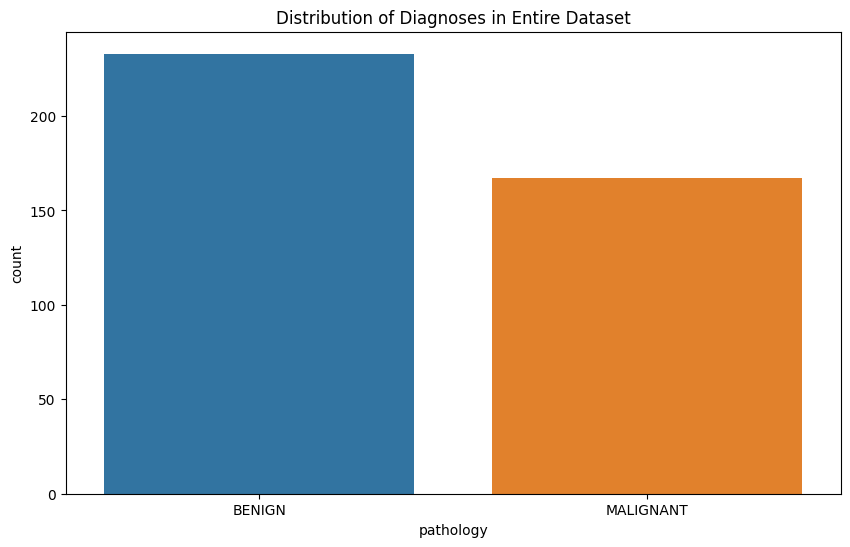

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

#concatenate training and testing datasets for 'mass' and 'calc'
#using the imputed test and train datasets
all_mass_data = pd.concat([mass_case_train, mass_case_test])
all_calc_data = pd.concat([calc_case_train, calc_case_test])

#countplot for diagnosis distribution
sns.countplot(x='pathology', data=pd.concat([all_mass_data, all_calc_data]))
plt.title('Distribution of Diagnoses in Entire Dataset')
plt.show()

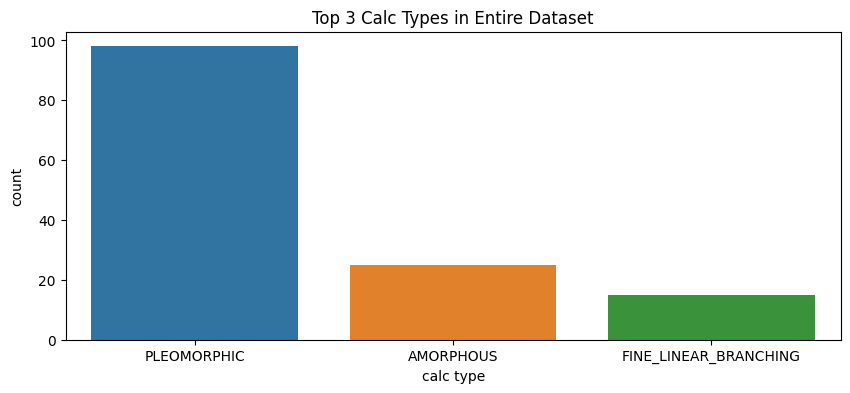

In [ ]:
plt.figure(figsize=(10, 4))

#concatenate 'calc' training and testing datasets
#using the imputed test and train datasets
all_calc_data = pd.concat([calc_case_train, calc_case_test])

#top 3 calc types
top_calc_types = all_calc_data['calc type'].value_counts().nlargest(3).index

#filter dataframe for the top 3 calc types
filtered_calc_data = all_calc_data[all_calc_data['calc type'].isin(top_calc_types)]

#countplot showing top 3 calc types
sns.countplot(x='calc type', data=filtered_calc_data, order=top_calc_types)
plt.title('Top 3 Calc Types in Entire Dataset')
plt.show()

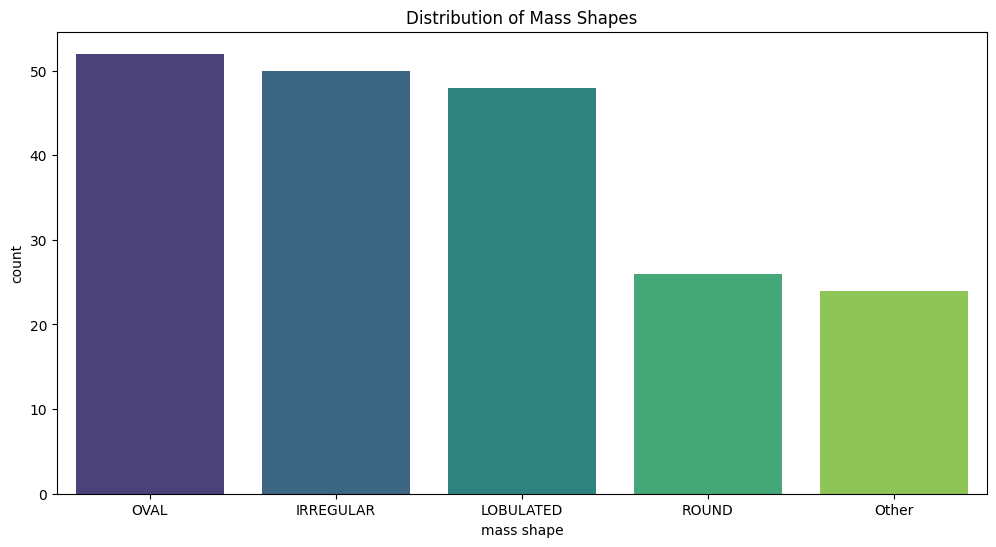

In [ ]:
plt.figure(figsize=(12, 6))

#concatenate 'mass' training and testing datasets
#using the imputed test and train datasets
all_mass_data = pd.concat([mass_case_train, mass_case_test])

#combine less frequent mass shapes into 'Other'
#top 4 largest values for mass shapes
top_mass_shapes = all_mass_data['mass shape'].value_counts().nlargest(4).index
all_mass_data['mass shape'] = np.where(all_mass_data['mass shape'].isin(top_mass_shapes), all_mass_data['mass shape'], 'Other')

#countplot for mass shapes
sns.countplot(x='mass shape', data=all_mass_data, palette='viridis')
plt.title('Distribution of Mass Shapes')
plt.show()

##**STEP 3: Pyspark/Machine Learning Implementation**

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import col, pandas_udf, PandasUDFType, udf, lit
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression, NaiveBayes
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import VectorAssembler, VectorIndexer,StringIndexer
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array


#initialize Spark session
sc = SparkContext()
spark = SparkSession.builder.master("local").appName("Colab").config('spark.ui.port', '4050').getOrCreate()

In [ ]:
spark

In [ ]:
# Retrieving image file paths to lists, filtered by benign and malignant
calc_train_benign = calc_case_train.loc[calc_case_train['pathology'] == 'BENIGN', 'image file path'].tolist()

calc_train_malignant = calc_case_train.loc[calc_case_train['pathology'] == 'MALIGNANT', 'image file path'].tolist()

calc_test_benign = calc_case_test.loc[calc_case_test['pathology'] == 'BENIGN', 'image file path'].tolist()

calc_test_malignant = calc_case_test.loc[calc_case_test['pathology'] == 'MALIGNANT', 'image file path'].tolist()

mass_train_benign = mass_case_train.loc[mass_case_train['pathology'] == 'BENIGN', 'image file path'].tolist()

mass_train_malignant = mass_case_train.loc[mass_case_train['pathology'] == 'MALIGNANT', 'image file path'].tolist()

mass_test_benign = mass_case_test.loc[mass_case_test['pathology'] == 'BENIGN', 'image file path'].tolist()

mass_test_malignant = mass_case_test.loc[mass_case_test['pathology'] == 'MALIGNANT', 'image file path'].tolist()

In [ ]:
# Convert filepath lists to spark image DFs
calc_train_benign = spark.read.format("binaryFile").option("pathGlobFilter", "*.jpg").option("recursiveFileLookup", True).load(calc_train_benign)

calc_train_malignant = spark.read.format("binaryFile").option("pathGlobFilter", "*.jpg").option("recursiveFileLookup", True).load(calc_train_malignant)

calc_test_benign = spark.read.format("binaryFile").option("pathGlobFilter", "*.jpg").option("recursiveFileLookup", True).load(calc_test_benign)

calc_test_malignant = spark.read.format("binaryFile").option("pathGlobFilter", "*.jpg").option("recursiveFileLookup", True).load(calc_test_malignant)

mass_train_benign = spark.read.format("binaryFile").option("pathGlobFilter", "*.jpg").option("recursiveFileLookup", True).load(mass_train_benign)

mass_train_malignant = spark.read.format("binaryFile").option("pathGlobFilter", "*.jpg").option("recursiveFileLookup", True).load(mass_train_malignant)

mass_test_benign = spark.read.format("binaryFile").option("pathGlobFilter", "*.jpg").option("recursiveFileLookup", True).load(mass_test_benign)

mass_test_malignant = spark.read.format("binaryFile").option("pathGlobFilter", "*.jpg").option("recursiveFileLookup", True).load(mass_test_malignant)

In [ ]:
# Adding labels to dataframes
calc_train_benign = calc_train_benign.withColumn("Target", lit(0))

calc_train_malignant = calc_train_malignant.withColumn("Target", lit(1))

calc_test_benign = calc_test_benign.withColumn("Target", lit(0))

calc_test_malignant = calc_test_malignant.withColumn("Target", lit(1))

mass_train_benign = mass_train_benign.withColumn("Target", lit(0))

mass_train_malignant = mass_train_malignant.withColumn("Target", lit(1))

mass_test_benign = mass_test_benign.withColumn("Target", lit(0))

mass_test_malignant = mass_test_malignant.withColumn("Target", lit(1))

In [ ]:
# Recombination of dataframes for calc dataset and mass dataset
calc_train = calc_train_benign.union(calc_train_malignant)
calc_test = calc_test_benign.union(calc_test_malignant)
calc = calc_train.union(calc_test)

mass_train = mass_train_benign.union(mass_train_malignant)
mass_test = mass_test_benign.union(mass_test_malignant)
mass = mass_train.union(mass_test)

In [ ]:
# select the base model
model = ResNet50(include_top=False)
model.summary()  # verify that the top layer is removed

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [ ]:
# Saves the model weights to a spark broadcast
bc_model_weights = sc.broadcast(model.get_weights())

In [ ]:
def model_fn():
  """
  Returns a model with top layer removed and broadcasted pretrained weights.
  """
  model = ResNet50(include_top=False)
  model.set_weights(bc_model_weights.value)
  return model

In [ ]:
def preprocess(content):
  """
  Preprocesses raw image bytes for prediction.
  """
  img = Image.open(io.BytesIO(content)).resize([224, 224])
  arr = img_to_array(img)
  arr = arr.repeat(3, axis=-1)
  return preprocess_input(arr)

In [ ]:
def featurize_series(model, content_series):
  """
  Featurize a pd.Series of raw images using the input model.
  :return: a pd.Series of image features
  """
  input = np.stack(content_series.map(preprocess))
  preds = model.predict(input)
  # For some layers, output features will be multi-dimensional tensors.
  # We flatten the feature tensors to vectors for easier storage in Spark DataFrames.
  output = [p.flatten() for p in preds]
  return pd.Series(output)

In [ ]:
@pandas_udf('array<float>', PandasUDFType.SCALAR_ITER)
def featurize_udf(content_series_iter):
  '''
  This method is a Scalar Iterator pandas UDF wrapping our featurization function.
  The decorator specifies that this returns a Spark DataFrame column of type ArrayType(FloatType).

  :param content_series_iter: This argument is an iterator over batches of data, where each batch
                              is a pandas Series of image data.
  '''
  # With Scalar Iterator pandas UDFs, we can load the model once and then re-use it
  # for multiple data batches.  This amortizes the overhead of loading big models.
  model = model_fn()
  for content_series in content_series_iter:
    yield featurize_series(model, content_series)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/functions.py:407: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


In [ ]:
# Featurization of image DFs
calc_features = calc.repartition(16).select(col("path"), featurize_udf("content").alias("features"), col("Target"))
mass_features = mass.repartition(16).select(col("path"), featurize_udf("content").alias("features"), col("Target"))

In [ ]:
# Post Processing of featurized image DFs
list_to_vector_udf = udf(lambda l: Vectors.dense(l), VectorUDT())

calc_features = calc_features.select(col("path"),  list_to_vector_udf(calc_features["features"]).alias("features"), col("Target"))

mass_features = mass_features.select(col("path"),  list_to_vector_udf(mass_features["features"]).alias("features"), col("Target"))

In [ ]:
# splitting in to training, validate and test set for calc data and mass data
calc_train_split, calc_validate_split, calc_test_split =  calc_features.randomSplit([0.6, 0.3, 0.1],42)

mass_train_split, mass_validate_split, mass_test_split =  mass_features.randomSplit([0.6, 0.3, 0.1],42)

In [ ]:
# This concatenates all feature columns into a single feature vector in a new column "featuresModel".
vectorAssembler = VectorAssembler(inputCols=['features'], outputCol="featuresModel")

In [ ]:
lr = LogisticRegression(maxIter=5, regParam=0.03,
                        elasticNetParam=0.5, labelCol="Target", featuresCol="featuresModel")

In [ ]:
sparkdn = Pipeline(stages=[vectorAssembler,lr])

In [ ]:
calc_model = sparkdn.fit(calc_train_split)

In [ ]:
calc_predictions = calc_model.transform(calc_test_split)

In [ ]:
calc_predictions.select("prediction", "Target", "features").show(5)

+----------+------+--------------------+
|prediction|Target|            features|
+----------+------+--------------------+
|       1.0|     0|[0.0,0.0,0.0,0.0,...|
|       0.0|     1|[0.0,0.0,0.0,0.0,...|
|       0.0|     1|[0.0,0.0,0.0,0.0,...|
|       0.0|     0|[0.0,0.0,0.0,0.0,...|
|       1.0|     0|[0.0,1.1057790517...|
+----------+------+--------------------+
only showing top 5 rows



In [ ]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(calc_predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.529412


In [ ]:
mass_model = sparkdn.fit(mass_train_split)

In [ ]:
mass_predictions = mass_model.transform(mass_test_split)

In [ ]:
mass_predictions.select("prediction", "Target", "features").show(5)

+----------+------+--------------------+
|prediction|Target|            features|
+----------+------+--------------------+
|       1.0|     0|[0.0,0.0,0.0,0.0,...|
|       0.0|     1|[0.0,0.0,0.0,0.0,...|
|       1.0|     0|[0.0,0.0,0.0,0.0,...|
|       0.0|     1|[0.0,0.0,0.0,0.0,...|
|       1.0|     1|[0.0,0.0,0.0,0.0,...|
+----------+------+--------------------+
only showing top 5 rows



In [ ]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(mass_predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.647059


In [ ]:
nb = NaiveBayes(modelType="multinomial", featuresCol="featuresModel", labelCol="Target")

In [ ]:
sparkdn2 = Pipeline(stages=[vectorAssembler,nb])

In [ ]:
calc_model2 = sparkdn2.fit(calc_train_split)

In [ ]:
calc_predictions2 = calc_model2.transform(calc_test_split)

In [ ]:
calc_predictions2.select("prediction", "Target", "features").show(5)

+----------+------+--------------------+
|prediction|Target|            features|
+----------+------+--------------------+
|       0.0|     0|[0.0,0.0,0.0,0.0,...|
|       0.0|     1|[0.0,0.0,0.0,0.0,...|
|       0.0|     1|[0.0,0.0,0.0,0.0,...|
|       0.0|     0|[0.0,0.0,0.0,0.0,...|
|       0.0|     0|[0.0,1.1057790517...|
+----------+------+--------------------+
only showing top 5 rows



In [ ]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(calc_predictions2)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.352941


In [ ]:
mass_model2 = sparkdn2.fit(mass_train_split)

In [ ]:
mass_predictions2 = mass_model2.transform(mass_test_split)

In [ ]:
mass_predictions2.select("prediction", "Target", "features").show(5)

+----------+------+--------------------+
|prediction|Target|            features|
+----------+------+--------------------+
|       0.0|     0|[0.0,0.0,0.0,0.0,...|
|       0.0|     1|[0.0,0.0,0.0,0.0,...|
|       0.0|     0|[0.0,0.0,0.0,0.0,...|
|       0.0|     1|[0.0,0.0,0.0,0.0,...|
|       1.0|     1|[0.0,0.0,0.0,0.0,...|
+----------+------+--------------------+
only showing top 5 rows



In [ ]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(mass_predictions2)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.411765


##**STEP 4: Visuals**

In [ ]:
import pyspark.pandas as ps

In [ ]:
calc_predictions = calc_predictions.toPandas()
calc_predictions.head(5)

,path,features,Target,featuresModel,rawPrediction,probability,prediction
0,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8867130279541...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8867130279541...","[-2.7091496468603258, 2.7091496468603258]","[0.06243561032851263, 0.9375643896714874]",1.0
1,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.6850938621368914, -3.6850938621368914]","[0.9755195142044606, 0.02448048579553941]",0.0
2,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.954173088073...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.954173088073...","[0.08244880886983874, -0.08244880886983874]","[0.5206005336699778, 0.4793994663300222]",0.0
3,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.3612695521976383, -1.3612695521976383]","[0.7959659557378692, 0.2040340442621308]",0.0
4,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 1.1057790517807007, 0.0, 0.5787389278411...",0,"(0.0, 1.1057790517807007, 0.0, 0.5787389278411...","[-0.7713930404518519, 0.7713930404518519]","[0.3161778407073897, 0.6838221592926104]",1.0


In [ ]:
calc_predictions['False Positive'] = np.where((calc_predictions['prediction'] == 1.0) & (calc_predictions['Target'] == 0), 'yes', 'no')
calc_predictions.head(5)

,path,features,Target,featuresModel,rawPrediction,probability,prediction,False Positive
0,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8867130279541...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8867130279541...","[-2.7091496468603258, 2.7091496468603258]","[0.06243561032851263, 0.9375643896714874]",1.0,yes
1,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.6850938621368914, -3.6850938621368914]","[0.9755195142044606, 0.02448048579553941]",0.0,no
2,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.954173088073...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.954173088073...","[0.08244880886983874, -0.08244880886983874]","[0.5206005336699778, 0.4793994663300222]",0.0,no
3,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.3612695521976383, -1.3612695521976383]","[0.7959659557378692, 0.2040340442621308]",0.0,no
4,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 1.1057790517807007, 0.0, 0.5787389278411...",0,"(0.0, 1.1057790517807007, 0.0, 0.5787389278411...","[-0.7713930404518519, 0.7713930404518519]","[0.3161778407073897, 0.6838221592926104]",1.0,yes


In [ ]:
calc_predictions['False Negative'] = np.where((calc_predictions['prediction'] == 0.0) & (calc_predictions['Target'] == 1), 'yes', 'no')
calc_predictions.head(5)

,path,features,Target,featuresModel,rawPrediction,probability,prediction,False Positive,False Negative
0,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8867130279541...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8867130279541...","[-2.7091496468603258, 2.7091496468603258]","[0.06243561032851263, 0.9375643896714874]",1.0,yes,no
1,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.6850938621368914, -3.6850938621368914]","[0.9755195142044606, 0.02448048579553941]",0.0,no,yes
2,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.954173088073...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.954173088073...","[0.08244880886983874, -0.08244880886983874]","[0.5206005336699778, 0.4793994663300222]",0.0,no,yes
3,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.3612695521976383, -1.3612695521976383]","[0.7959659557378692, 0.2040340442621308]",0.0,no,no
4,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 1.1057790517807007, 0.0, 0.5787389278411...",0,"(0.0, 1.1057790517807007, 0.0, 0.5787389278411...","[-0.7713930404518519, 0.7713930404518519]","[0.3161778407073897, 0.6838221592926104]",1.0,yes,no


In [ ]:
mass_predictions = mass_predictions.toPandas()
mass_predictions.head(5)

,path,features,Target,featuresModel,rawPrediction,probability,prediction
0,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3168507814407...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3168507814407...","[-1.8831910991881018, 1.8831910991881018]","[0.13202276710072464, 0.8679772328992754]",1.0
1,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.9869613647460...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.9869613647460...","[0.5338355981458754, -0.5338355981458754]","[0.6303772591697596, 0.3696227408302404]",0.0
2,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.001198856480797, 3.001198856480797]","[0.047371742222660294, 0.9526282577773397]",1.0
3,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9316129684448...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9316129684448...","[1.8330863818646048, -1.8330863818646048]","[0.862128992368103, 0.13787100763189697]",0.0
4,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1414208412170...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1414208412170...","[-0.20780920027399774, 0.20780920027399774]","[0.4482338579397006, 0.5517661420602994]",1.0


In [ ]:
mass_predictions['False Positive'] = np.where((mass_predictions['prediction'] == 1.0) & (mass_predictions['Target'] == 0), 'yes', 'no')
mass_predictions.head(5)

,path,features,Target,featuresModel,rawPrediction,probability,prediction,False Positive
0,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3168507814407...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3168507814407...","[-1.8831910991881018, 1.8831910991881018]","[0.13202276710072464, 0.8679772328992754]",1.0,yes
1,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.9869613647460...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.9869613647460...","[0.5338355981458754, -0.5338355981458754]","[0.6303772591697596, 0.3696227408302404]",0.0,no
2,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.001198856480797, 3.001198856480797]","[0.047371742222660294, 0.9526282577773397]",1.0,yes
3,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9316129684448...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9316129684448...","[1.8330863818646048, -1.8330863818646048]","[0.862128992368103, 0.13787100763189697]",0.0,no
4,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1414208412170...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1414208412170...","[-0.20780920027399774, 0.20780920027399774]","[0.4482338579397006, 0.5517661420602994]",1.0,no


In [ ]:
mass_predictions['False Negative'] = np.where((mass_predictions['prediction'] == 0.0) & (mass_predictions['Target'] == 1), 'yes', 'no')
mass_predictions.head(5)

,path,features,Target,featuresModel,rawPrediction,probability,prediction,False Positive,False Negative
0,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3168507814407...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3168507814407...","[-1.8831910991881018, 1.8831910991881018]","[0.13202276710072464, 0.8679772328992754]",1.0,yes,no
1,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.9869613647460...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.9869613647460...","[0.5338355981458754, -0.5338355981458754]","[0.6303772591697596, 0.3696227408302404]",0.0,no,yes
2,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.001198856480797, 3.001198856480797]","[0.047371742222660294, 0.9526282577773397]",1.0,yes,no
3,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9316129684448...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9316129684448...","[1.8330863818646048, -1.8330863818646048]","[0.862128992368103, 0.13787100763189697]",0.0,no,yes
4,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1414208412170...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1414208412170...","[-0.20780920027399774, 0.20780920027399774]","[0.4482338579397006, 0.5517661420602994]",1.0,no,no


In [ ]:
calc_predictions2 = calc_predictions2.toPandas()
calc_predictions2.head(5)

,path,features,Target,featuresModel,rawPrediction,probability,prediction
0,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8867130279541...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8867130279541...","[-399904.1969347684, -403783.022394138]","[1.0, 0.0]",0.0
1,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-518933.66983260715, -528614.9960985569]","[1.0, 0.0]",0.0
2,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.954173088073...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.954173088073...","[-294274.6049510596, -294437.4939185893]","[1.0, 1.8122588903448206e-71]",0.0
3,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-393906.6995340886, -399733.3426455749]","[1.0, 0.0]",0.0
4,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 1.1057790517807007, 0.0, 0.5787389278411...",0,"(0.0, 1.1057790517807007, 0.0, 0.5787389278411...","[-410688.1333561335, -411062.78712286404]","[1.0, 1.9495594567995498e-163]",0.0


In [ ]:
calc_predictions2['False Positive'] = np.where((calc_predictions2['prediction'] == 1.0) & (calc_predictions2['Target'] == 0), 'yes', 'no')
calc_predictions2.head(5)

,path,features,Target,featuresModel,rawPrediction,probability,prediction,False Positive
0,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8867130279541...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8867130279541...","[-399904.1969347684, -403783.022394138]","[1.0, 0.0]",0.0,no
1,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-518933.66983260715, -528614.9960985569]","[1.0, 0.0]",0.0,no
2,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.954173088073...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.954173088073...","[-294274.6049510596, -294437.4939185893]","[1.0, 1.8122588903448206e-71]",0.0,no
3,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-393906.6995340886, -399733.3426455749]","[1.0, 0.0]",0.0,no
4,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 1.1057790517807007, 0.0, 0.5787389278411...",0,"(0.0, 1.1057790517807007, 0.0, 0.5787389278411...","[-410688.1333561335, -411062.78712286404]","[1.0, 1.9495594567995498e-163]",0.0,no


In [ ]:
calc_predictions2['False Negative'] = np.where((calc_predictions2['prediction'] == 0.0) & (calc_predictions2['Target'] == 1), 'yes', 'no')
calc_predictions2.head(5)

,path,features,Target,featuresModel,rawPrediction,probability,prediction,False Positive,False Negative
0,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8867130279541...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8867130279541...","[-399904.1969347684, -403783.022394138]","[1.0, 0.0]",0.0,no,no
1,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-518933.66983260715, -528614.9960985569]","[1.0, 0.0]",0.0,no,yes
2,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.954173088073...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.954173088073...","[-294274.6049510596, -294437.4939185893]","[1.0, 1.8122588903448206e-71]",0.0,no,yes
3,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-393906.6995340886, -399733.3426455749]","[1.0, 0.0]",0.0,no,no
4,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 1.1057790517807007, 0.0, 0.5787389278411...",0,"(0.0, 1.1057790517807007, 0.0, 0.5787389278411...","[-410688.1333561335, -411062.78712286404]","[1.0, 1.9495594567995498e-163]",0.0,no,no


In [ ]:
mass_predictions2 = mass_predictions2.toPandas()
mass_predictions2.head(5)

,path,features,Target,featuresModel,rawPrediction,probability,prediction
0,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3168507814407...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3168507814407...","[-348562.16172578366, -352332.0300166792]","[1.0, 0.0]",0.0
1,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.9869613647460...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.9869613647460...","[-308337.5486566045, -310304.69491723686]","[1.0, 0.0]",0.0
2,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-440257.0375409883, -442325.8085703401]","[1.0, 0.0]",0.0
3,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9316129684448...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9316129684448...","[-417436.2306039818, -420476.2555429737]","[1.0, 0.0]",0.0
4,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1414208412170...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1414208412170...","[-322125.3898861275, -318343.9120092994]","[0.0, 1.0]",1.0


In [ ]:
mass_predictions2['False Positive'] = np.where((mass_predictions2['prediction'] == 1.0) & (mass_predictions2['Target'] == 0), 'yes', 'no')
mass_predictions2.head(5)

,path,features,Target,featuresModel,rawPrediction,probability,prediction,False Positive
0,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3168507814407...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3168507814407...","[-348562.16172578366, -352332.0300166792]","[1.0, 0.0]",0.0,no
1,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.9869613647460...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.9869613647460...","[-308337.5486566045, -310304.69491723686]","[1.0, 0.0]",0.0,no
2,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-440257.0375409883, -442325.8085703401]","[1.0, 0.0]",0.0,no
3,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9316129684448...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9316129684448...","[-417436.2306039818, -420476.2555429737]","[1.0, 0.0]",0.0,no
4,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1414208412170...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1414208412170...","[-322125.3898861275, -318343.9120092994]","[0.0, 1.0]",1.0,no


In [ ]:
mass_predictions2['False Negative'] = np.where((mass_predictions['prediction'] == 0.0) & (mass_predictions['Target'] == 1), 'yes', 'no')
mass_predictions.head(5)

,path,features,Target,featuresModel,rawPrediction,probability,prediction,False Positive,False Negative
0,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3168507814407...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3168507814407...","[-1.8831910991881018, 1.8831910991881018]","[0.13202276710072464, 0.8679772328992754]",1.0,yes,no
1,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.9869613647460...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.9869613647460...","[0.5338355981458754, -0.5338355981458754]","[0.6303772591697596, 0.3696227408302404]",0.0,no,yes
2,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.001198856480797, 3.001198856480797]","[0.047371742222660294, 0.9526282577773397]",1.0,yes,no
3,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9316129684448...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9316129684448...","[1.8330863818646048, -1.8330863818646048]","[0.862128992368103, 0.13787100763189697]",0.0,no,yes
4,file:/content/drive/MyDrive/breastCancerProjec...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1414208412170...",1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1414208412170...","[-0.20780920027399774, 0.20780920027399774]","[0.4482338579397006, 0.5517661420602994]",1.0,no,no


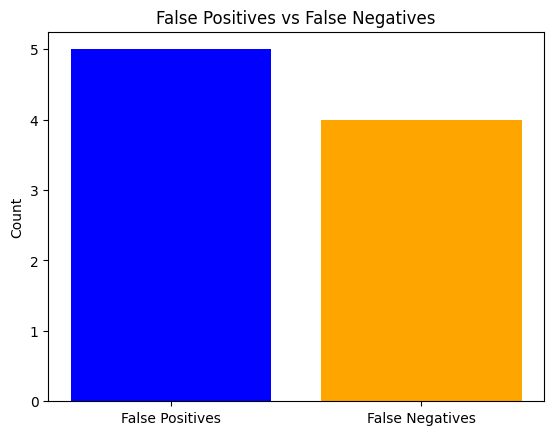

In [ ]:
# Create a confusion matrix
conf_matrix = calc_predictions.groupby(["Target", "prediction"]).size().reset_index(name='count')

# Extract values for FP and FN
false_positives = conf_matrix.loc[(conf_matrix['Target'] == 0) & (conf_matrix['prediction'] == 1), 'count'].values[0]
false_negatives = conf_matrix.loc[(conf_matrix['Target'] == 1) & (conf_matrix['prediction'] == 0), 'count'].values[0]

# Plot the values
fig, ax = plt.subplots()
labels = ["False Positives", "False Negatives"]
counts = [false_positives, false_negatives]

ax.bar(labels, counts, color=['blue', 'orange'])
ax.set_ylabel('Count')
ax.set_title('False Positives vs False Negatives')

plt.show()

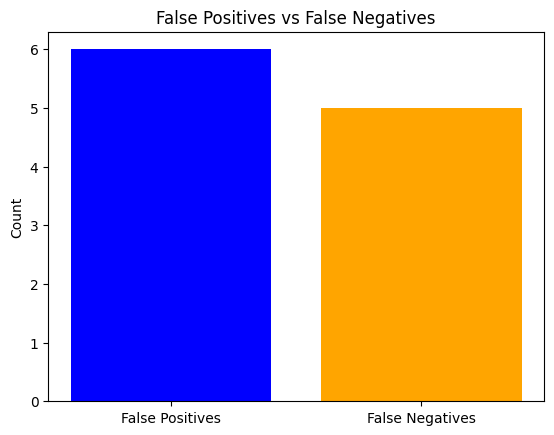

In [ ]:
# Create a confusion matrix
conf_matrix = mass_predictions.groupby(["Target", "prediction"]).size().reset_index(name='count')

# Extract values for FP and FN
false_positives = conf_matrix.loc[(conf_matrix['Target'] == 0) & (conf_matrix['prediction'] == 1), 'count'].values[0]
false_negatives = conf_matrix.loc[(conf_matrix['Target'] == 1) & (conf_matrix['prediction'] == 0), 'count'].values[0]

# Plot the values
fig, ax = plt.subplots()
labels = ["False Positives", "False Negatives"]
counts = [false_positives, false_negatives]

ax.bar(labels, counts, color=['blue', 'orange'])
ax.set_ylabel('Count')
ax.set_title('False Positives vs False Negatives')

plt.show()

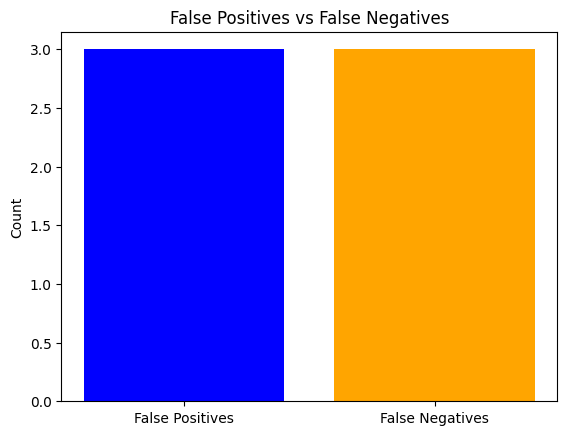

In [ ]:
# Create a confusion matrix
conf_matrix = calc_predictions2.groupby(["Target", "prediction"]).size().reset_index(name='count')

# Extract values for FP and FN
false_positives = conf_matrix.loc[(conf_matrix['Target'] == 0) & (conf_matrix['prediction'] == 1), 'count'].values[0]
false_negatives = conf_matrix.loc[(conf_matrix['Target'] == 1) & (conf_matrix['prediction'] == 0), 'count'].values[0]

# Plot the values
fig, ax = plt.subplots()
labels = ["False Positives", "False Negatives"]
counts = [false_positives, false_negatives]

ax.bar(labels, counts, color=['blue', 'orange'])
ax.set_ylabel('Count')
ax.set_title('False Positives vs False Negatives')

plt.show()

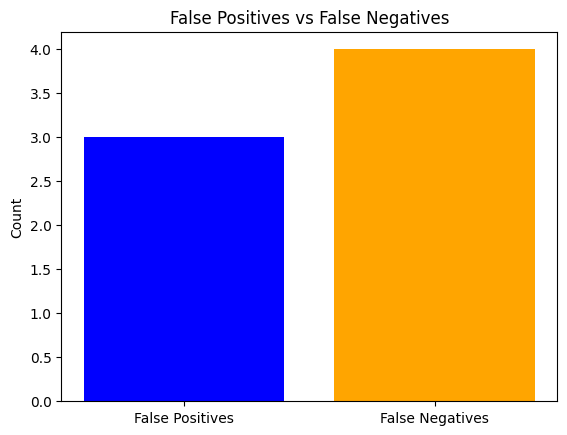

In [ ]:
# Create a confusion matrix
conf_matrix = mass_predictions2.groupby(["Target", "prediction"]).size().reset_index(name='count')

# Extract values for FP and FN
false_positives = conf_matrix.loc[(conf_matrix['Target'] == 0) & (conf_matrix['prediction'] == 1), 'count'].values[0]
false_negatives = conf_matrix.loc[(conf_matrix['Target'] == 1) & (conf_matrix['prediction'] == 0), 'count'].values[0]

# Plot the values
fig, ax = plt.subplots()
labels = ["False Positives", "False Negatives"]
counts = [false_positives, false_negatives]

ax.bar(labels, counts, color=['blue', 'orange'])
ax.set_ylabel('Count')
ax.set_title('False Positives vs False Negatives')

plt.show()

##**STEP 5: Conclusion**

Challenges
*   Lengthy runtime initially for algorithms (>4 hours)
*   Pyspark methodology took time and trial/error to figure out

Future Improvements

*   Test if other transfer learning models (VGG19, InceptionV3, etc.) provide better featurization that improves performance of classification algorithms
*   Run on larger datasets at a faster runtime with more resources (potentially through Databricks/AWS)

Future Work
*   Include additional algorithms that medical researchers commonly use like Random Forest (RF) or K-Nearest Neighbors (KNN) to see how different models reveal different insights and results
*   Build a neural network using spark data and see if that could perform better than transfer learning featurization/classification algorithms




##References
*   https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/
*   https://medium.com/@nutanbhogendrasharma/logistic-regression-in-pyspark-ml-feature-with-breast-cancer-data-set-a7ae6bcef4ee
* https://github.com/tntn123/spark_transferlearning/blob/main/main.py
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9818155/
* https://lytix.be/transfer-learning-in-spark-for-image-recognition/